In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mat

df = pd.read_csv("job-market.csv")
# df["Classification"].value_counts()
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


<Axes: ylabel='Classification'>

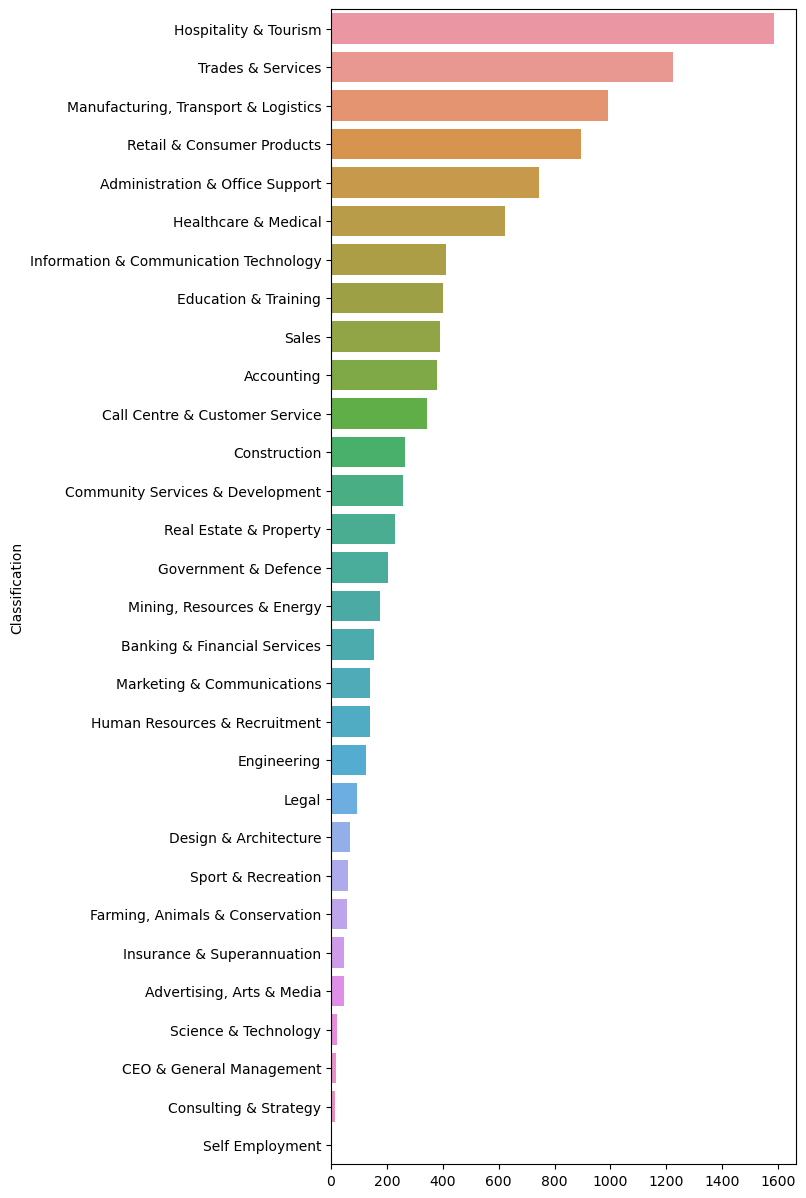

In [59]:
%matplotlib inline
f, ax = plt.subplots(figsize=(6,15))
df2 = df.groupby('Classification').size()
df2 = df2.sort_values(ascending=False)
sns.barplot(y=df2.index, x=df2.values)

In [75]:
import matplotlib
#create dataframe for salary ranges
highsals = df.groupby('HighestSalary').size()
lowsals = df.groupby('LowestSalary').size()
lowsals.head(10)
highsals.head(10)
# rangesals = df["HighestSalary"] - df["LowestSalary"]
# idk how i should do the range sals, if i just do above everything is 20 or 30

HighestSalary
30.0    3894
40.0    1842
50.0    2519
60.0    1844
dtype: int64

([<matplotlib.patches.Wedge at 0x22e8e272690>,
 [Text(0.38693785945960824, 1.029698544680343, '30.0'),
  Text(-1.0883136102638538, 0.15991712139247855, '40.0'),
  Text(-0.38757836308420895, -1.029457630244667, '50.0'),
  Text(0.923929845284454, -0.5969536338717146, '60.0')])

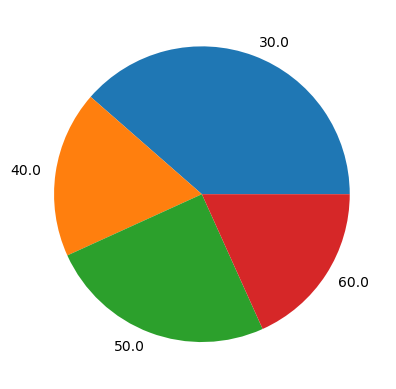

In [81]:
#salary ranges plot
fig, ax = plt.subplots()
# ax.pie(lowsals.values, labels=lowsals.index)
ax.pie(highsals.values, labels=highsals.index)
# idk how you did the fancy patches.circle thing, i tried and couldnt get it going

In [112]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
totalCount = locationDf['Count'].sum()
locationDf['Percentage'] = locationDf['Count'] / totalCount * 100
percentageThreshold = 10
locationDf.loc[locationDf['Percentage'] < percentageThreshold, 'Location'] = 'Other'
locationDf
locations = locationDf.groupby('Location').size()
locations

# so logic is as follows:
# if x in location is less than a certain percentage, then assign to 'Other'
# otherwise leave it
# that way its not all individual, im just strugglign to do this and ive spent an hour on it already and i want to move on

ValueError: 'Location' is both an index level and a column label, which is ambiguous.

([<matplotlib.patches.Wedge at 0x22e8e300050>,
 [Text(1.0969865693670122, 0.08136624993443776, 'ACT'),
  Text(1.0603253271887307, 0.29276304500758205, 'Adelaide'),
  Text(1.0146064147255744, 0.42493978773199814, 'Adelaide Hills & Barossa'),
  Text(1.0107316680216354, 0.4340754488083872, 'Albany & Great Southern'),
  Text(1.0067746644951947, 0.4431757833304844, 'Albury Area'),
  Text(1.001748571175668, 0.45442249080289554, 'Alice Springs & Central Australia'),
  Text(0.9967416395653439, 0.4653021641434632, 'Bairnsdale & Gippsland'),
  Text(0.9872809738713232, 0.4850528616879729, 'Ballarat & Central Highlands'),
  Text(0.9729966889937677, 0.5131056842475686, 'Bendigo, Goldfields & Macedon Ranges'),
  Text(0.958587619399274, 0.5395458978941761, 'Blue Mountains & Central West'),
  Text(0.7060901805155111, 0.8434670455800708, 'Brisbane'),
  Text(0.372164138136483, 1.0351298731488376, 'Broome & Kimberley'),
  Text(0.35148324795301056, 1.042333692446139, 'Bunbury & South West'),
  Text(0.3270

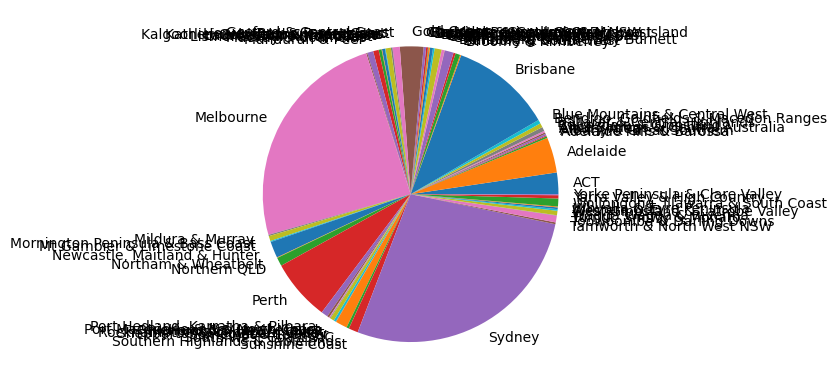

In [96]:
%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm
fig, ax = plt.subplots()
ax.pie(locationDf["Count"], labels=locationDf["Location"])


